In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from gmsdb import GMSDB

In [22]:
from sklearn.manifold import TSNE

data = np.loadtxt('09/data.csv', delimiter=',', dtype=str)
n_rows = data.shape[0]

parts = []
for idx in range(2, data.shape[1]):
    col = data[:, idx]
    nums = []
    for x in col:
        x = x.strip()
        if x in ['?', 'None', '']:
            nums.append(np.nan)
        else:
            try:
                nums.append(float(x))
            except:
                nums.append(np.nan)
    arr = np.array(nums)
    if np.all(np.isnan(arr)):
        continue
    arr = np.nan_to_num(arr, nan=np.nanmean(arr))
    parts.append(arr.reshape(-1, 1))

X_full = np.hstack(parts)
mean = X_full.mean(axis=0)
std = X_full.std(axis=0)
std[std == 0] = 1
X_scaled = (X_full - mean) / std

pca = PCA(n_components=2)
X = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

print(f'{X_full.shape[0]} точек, {X_full.shape[1]} признаков')

10230 точек, 14 признаков


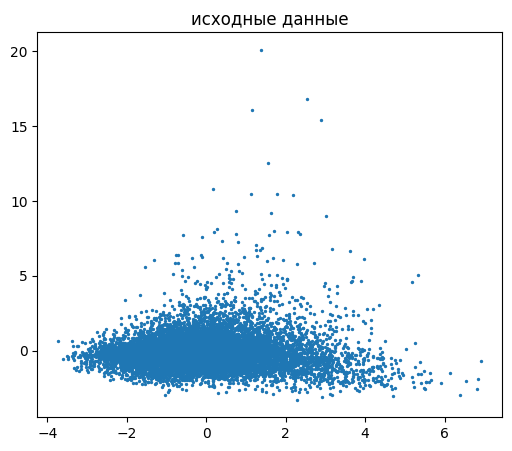

In [23]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.title('исходные данные')
plt.show()

In [24]:
def plot(X_pca, X_tsne, labels, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].scatter(X_pca[:, 0], X_pca[:, 1], s=2, c=labels)
    axes[0].set_title(f'{title} (PCA)')
    axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], s=2, c=labels)
    axes[1].set_title(f'{title} (t-SNE)')
    plt.show()

KMeans: Silhouette = 0.12819410881985918


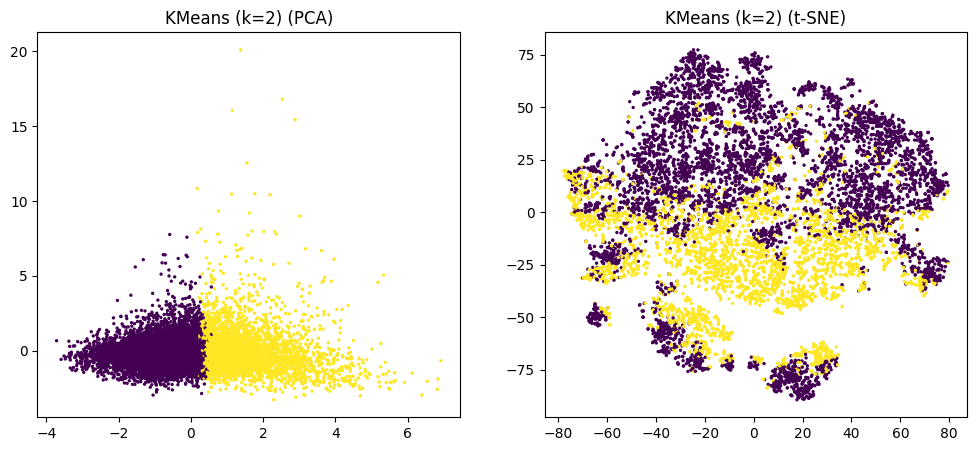

In [25]:
model = KMeans(n_clusters=2, n_init=10, random_state=42)
km_labels = model.fit_predict(X_scaled)
sil = silhouette_score(X_scaled, km_labels)
print(f'KMeans: Silhouette = {sil}')
plot(X, X_tsne, km_labels, 'KMeans (k=2)')

Agglomerative: Davies-Bouldin = 3.589373139258199


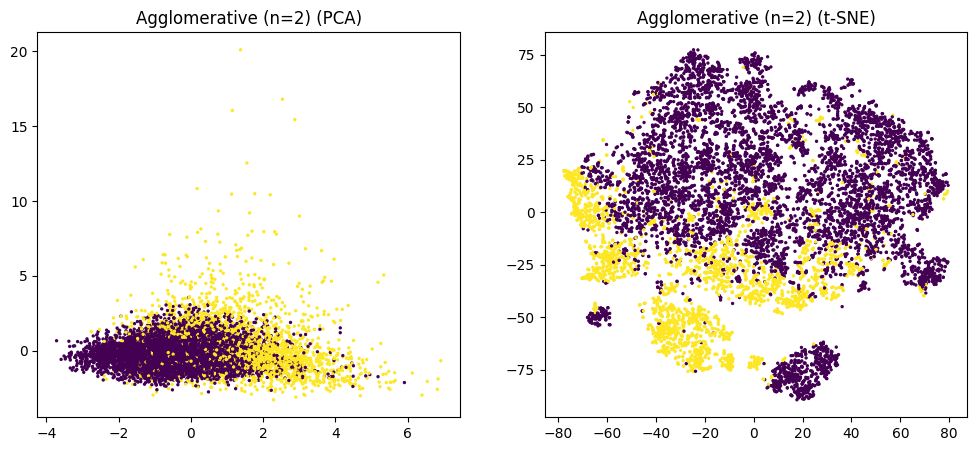

In [26]:
model = AgglomerativeClustering(n_clusters=2)
agg_labels = model.fit_predict(X_scaled)
db = davies_bouldin_score(X_scaled, agg_labels)
print(f'Agglomerative: Davies-Bouldin = {db}')
plot(X, X_tsne, agg_labels, 'Agglomerative (n=2)')